### K - MEAN CLUSTER
Divides data into k non overlapping clusters and internally no clusters are there.

The main aim is to minimize the intra-cluster distance between the data points and there respective cluster centroid.
and maximize the inter-cluster distance between the cluster centroids.


Types of clustering techniques
- Partioning (K-Mean is type of partitioning clustering)
- Hierarchical
- density based clustering

Elbow Method to find optimal k value
- uses the idea of within cluster sum of squares (WCSS)
- WCSS is the sum of squared distance between each point and the centroid in a cluster.
- As we increase the number of clusters, the WCSS value decreases as the points are closer to their respective centroids.
- WSS indicates how densely the data points are packed within a cluster.

Silhouette Coefficient 
- measures how similar a data point is to its own cluster compared to other clusters.
- combines ideas of both cohesion and separation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset 
data = pd.read_csv('environmental factors.csv')
data.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814


In [3]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Display scaled data
print(pd.DataFrame(data_scaled, columns=data.columns).head())

   temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316   
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866   
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827   
3     0.363328  0.355146    0.569224         -0.968007         -1.093072   
4    -1.175669 -0.096466   -0.062635          0.308475         -1.013623   

   pollution_level  
0         1.193409  
1        -0.029923  
2        -1.067119  
3         0.809835  
4        -0.292954  


   temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316   
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866   
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827   
3     0.363328  0.355146    0.569224         -0.968007         -1.093072   
4    -1.175669 -0.096466   -0.062635          0.308475         -1.013623   

   pollution_level  
0         1.193409  
1        -0.029923  
2        -1.067119  
3         0.809835  
4        -0.292954  


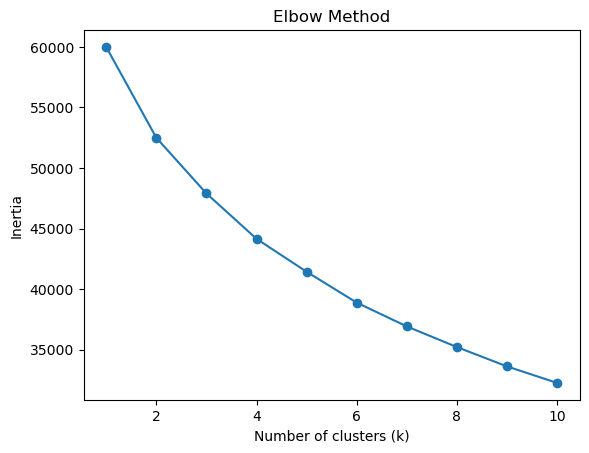

In [4]:
# Use the Elbow Method to find the optimal number of clusters (k)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Display scaled data
print(pd.DataFrame(data_scaled, columns=data.columns).head())


# Use the Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to find the "elbow"
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()




In [ ]:
# Apply K-Means Clustering with k = 7 (as an example)
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Display the first few rows with cluster labels
print(data.head())

   temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  cluster  
0        84.723658        6  
1        49.451704        5  
2        19.546561        6  
3        73.664179        4  
4        41.867814        6  


Silhouette Score: 0.12205646149181477


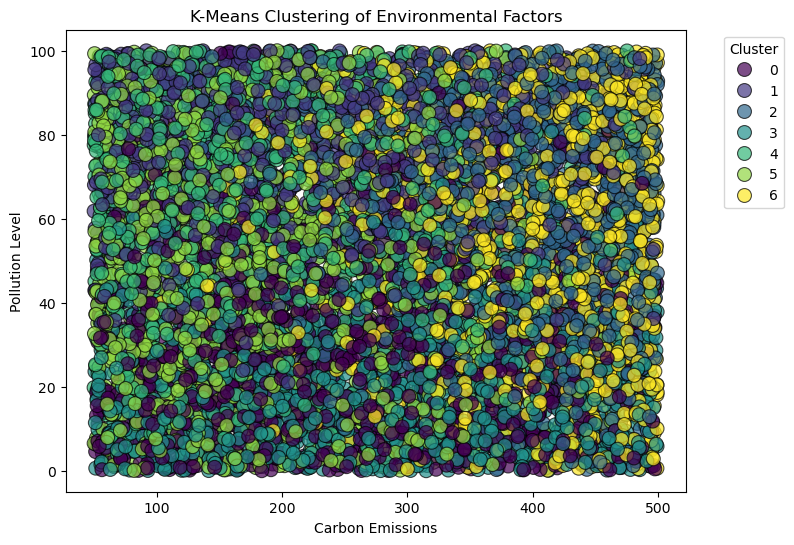

In [ ]:
# Calculate Silhouette Score
sil_score = silhouette_score(data_scaled, data['cluster'])
print(f'Silhouette Score: {sil_score}')

import seaborn as sns
import matplotlib.pyplot as plt
# Assuming `data` already contains the cluster labels (from the KMeans model)
# We'll use two features to plot: 'carbon_emissions' and 'pollution_level'
plt.figure(figsize=(8, 6))
# Create a scatter plot with the cluster labels
sns.scatterplot(x='carbon_emissions', y='pollution_level', hue='cluster', 
                data=data, palette='viridis', s=100, alpha=0.7, edgecolor='k')
# Title and labels
plt.title('K-Means Clustering of Environmental Factors')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
# Display the plot
plt.show()


### HEIRARCHICAL CLUSTERING
- Used to group unlabeled data points into clusters based on their similarity.
- It creates a hierarchy of clusters that can be represented as a tree-like structure called a dendrogram.

Types of Hierarchical Clustering
- Agglomerative Clustering (Bottom-Up Approach):
   - Consider it as bringing each data point as a single cluster and then merging them based on similarity.
   - The process continues until all data points are merged into a single cluster or a stopping criterion is met.
- Divisive Clustering (Top-Down Approach):
   - Consider it as starting with all data points in a single cluster and then splitting them based on dissimilarity.

Dendogram
- A dendrogram is a tree-like diagram that illustrates the arrangement of clusters produced by hierarchical clustering
- More the distance between the branches of the dendrogram, more dissimilarity (more distance) between the clusters.
- We can set a threshold distance to cut the dendrogram and form clusters based on that distance.

Applications of Heirarchical Clustering
- Identifying fake news
- Identifying criminal activity 
- Document Analysis 
- Phylogenetic tree analysis in bioinformatics

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
# Importing the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:

# Check for missing values
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
dataset = df

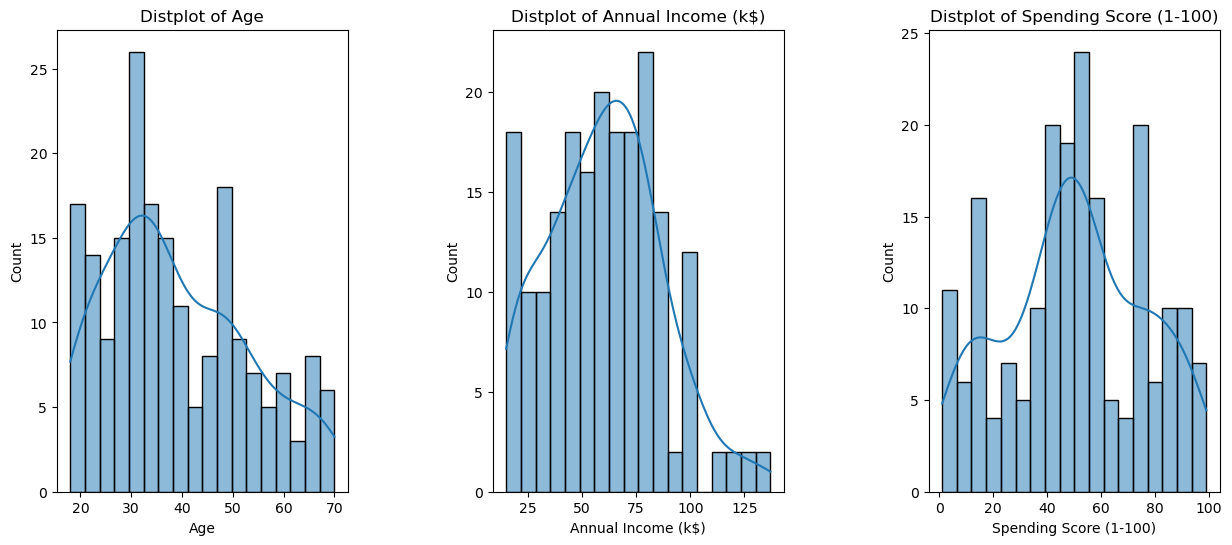

In [ ]:
plt.figure(1 ,figsize = (15 , 6))
graph = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    graph += 1  
    # ploting graph
    plt.subplot(1 , 3 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(dataset[x] , bins = 18,kde=True)
    plt.title('Distplot of {}'.format(x))
    
plt.show()





In [17]:
# Inserted features 
X = dataset.iloc[:, [3, 4]].values

In [18]:
X.shape

(200, 2)

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

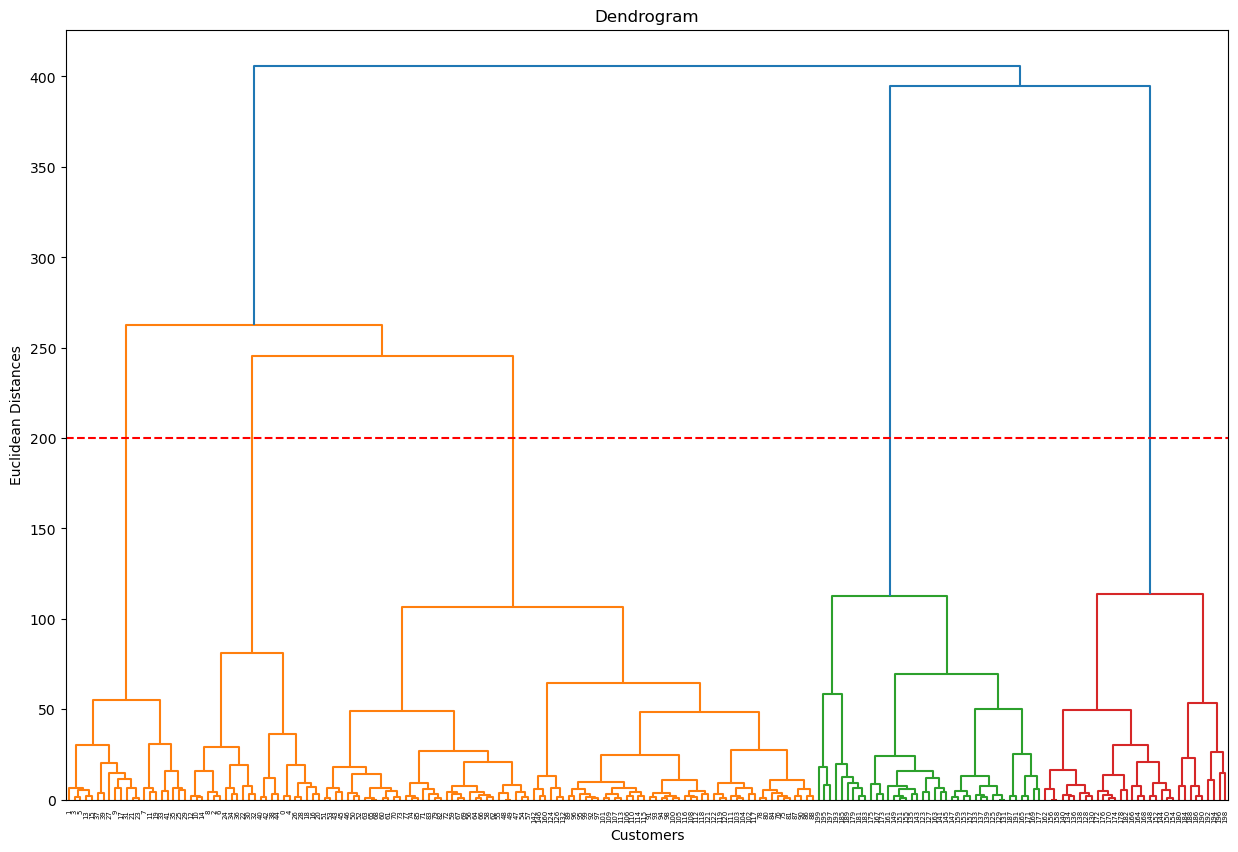

In [ ]:
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=200, color='r', linestyle='--')
plt.show()

In [ ]:
# No.of clusters is 5 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

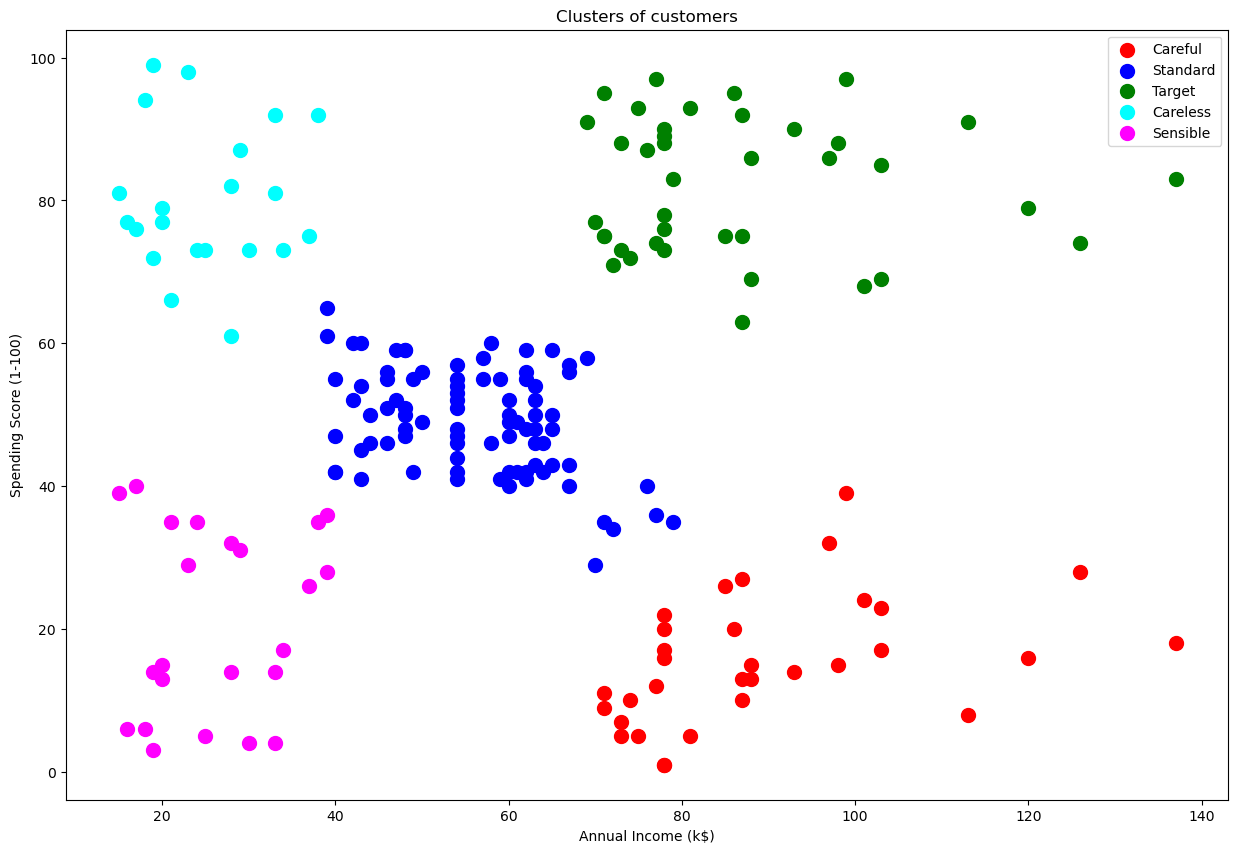

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### DBSCAN (DENSITY BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE) CLUSTERING
- identifies clusters based on the density of data points in a region.
- handles arbitrary shaped clusters and is robust to noise and outliers.

Key Parameters of DBSCAN
- Cluster Density: Minimum number of points required to form a dense region (MinPts).
- Epsilon (ε): The maximum distance between two points for them to be considered as neighbors.
- MinPts: The minimum number of points required to form a dense region (core point).

Types of Points in DBSCAN
- Noise : Points that do not belong to any cluster are considered noise or outliers.
- Core Points: Points that have at least MinPts within a specified radius (epsilon).
- Border Points: Points that are within the epsilon radius of a core point but do not have enough neighbors to be core points themselves.

Applications of DBSCAN
- Geospatial Data Analysis
- Anomaly Detection
- Image Segmentation


Q. Differentiate between K-Mean Clustering and DBSCAN Clustering.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [ ]:
# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
					cluster_std=0.50, random_state=0)

['y', 'b', 'g', 'r']


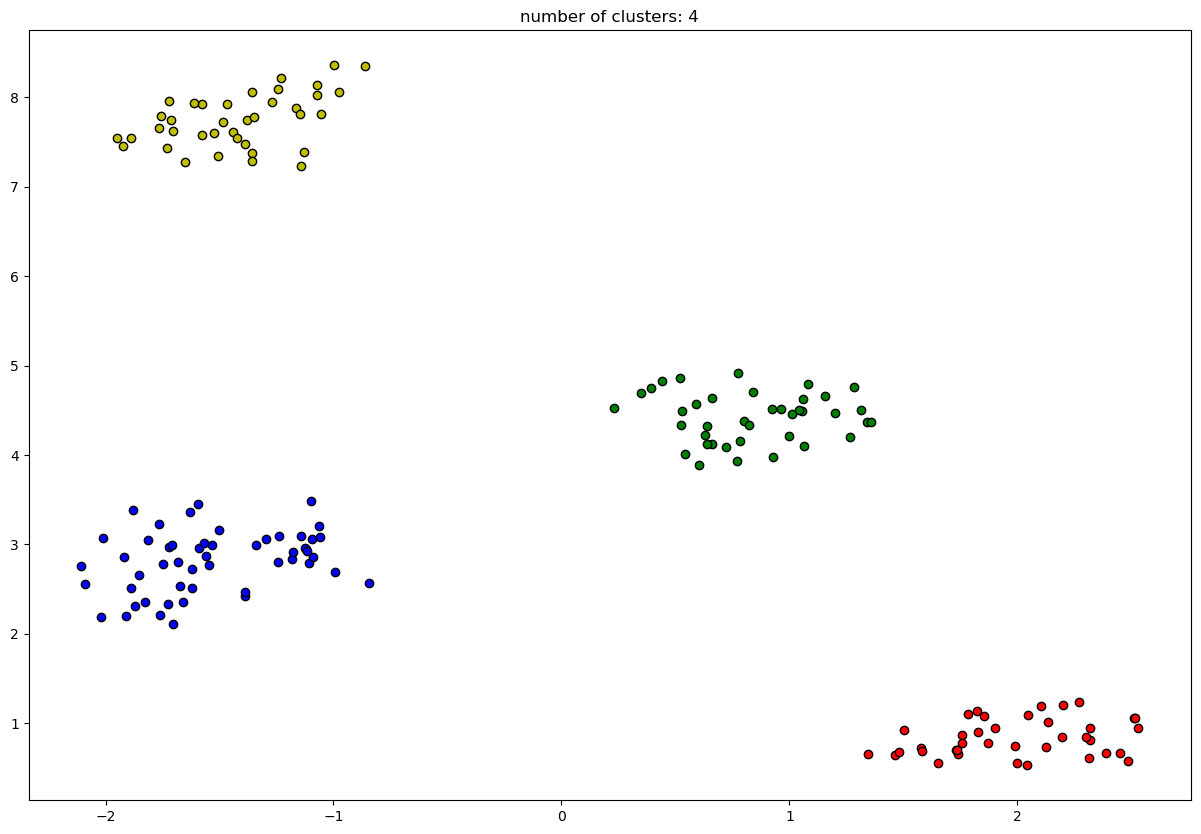

In [28]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


In [ ]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.13
Adjusted Rand Index: 0.31
